In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import librosa

In [2]:
TRAIN_DIR = '../course_work/VGAF/Train_Frames/'
VAL_DIR = '../course_work/VGAF/Train_Frames/'
train_video_data = pd.read_csv("../course_work/VGAF/txt_files/train_data.csv")
validation_video_data = pd.read_csv("../course_work/VGAF/txt_files/val_data.csv")

In [3]:
train_video_data

,image,label
0,6_46_frame0.jpg,2
1,97_4_frame4.jpg,3
2,97_14_frame4.jpg,3
3,324_113_frame3.jpg,2
4,101_17_frame3.jpg,1
...,...,...
14689,273_6_frame4.jpg,2
14690,13_25_frame5.jpg,1
14691,37_37_frame4.jpg,2
14692,75_7_frame0.jpg,1


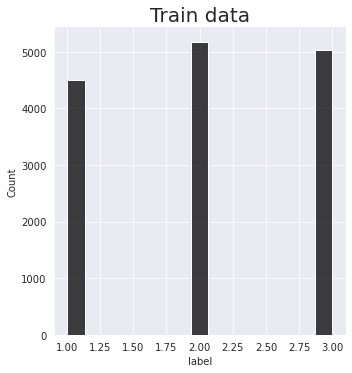

In [4]:
sns.set_style("darkgrid")
sns.displot(data=train_video_data["label"], color="black")
plt.title("Train data", fontsize=20);

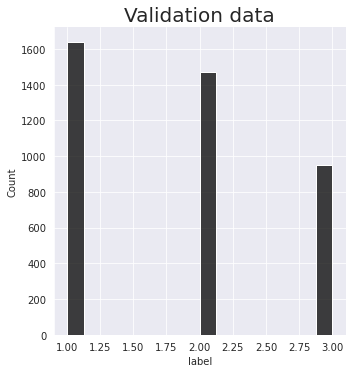

In [5]:
sns.set_style("darkgrid")
sns.displot(data=validation_video_data["label"],color='black');
plt.title("Validation data", fontsize=20);

In [13]:
def plot_image_examples(df, rows=3, cols=3, title='Image examples'):
    fig, axs = plt.subplots(rows, cols, figsize=(20,20))
    for row in range(rows):
        for col in range(cols):
            idx = np.random.randint(len(df), size=1)[0]
            img_id = df.iloc[idx].image
            
            img = Image.open(TRAIN_DIR + img_id)
            axs[row, col].imshow(img)

            
            axs[row, col].axis('off')
            
    plt.suptitle(title)

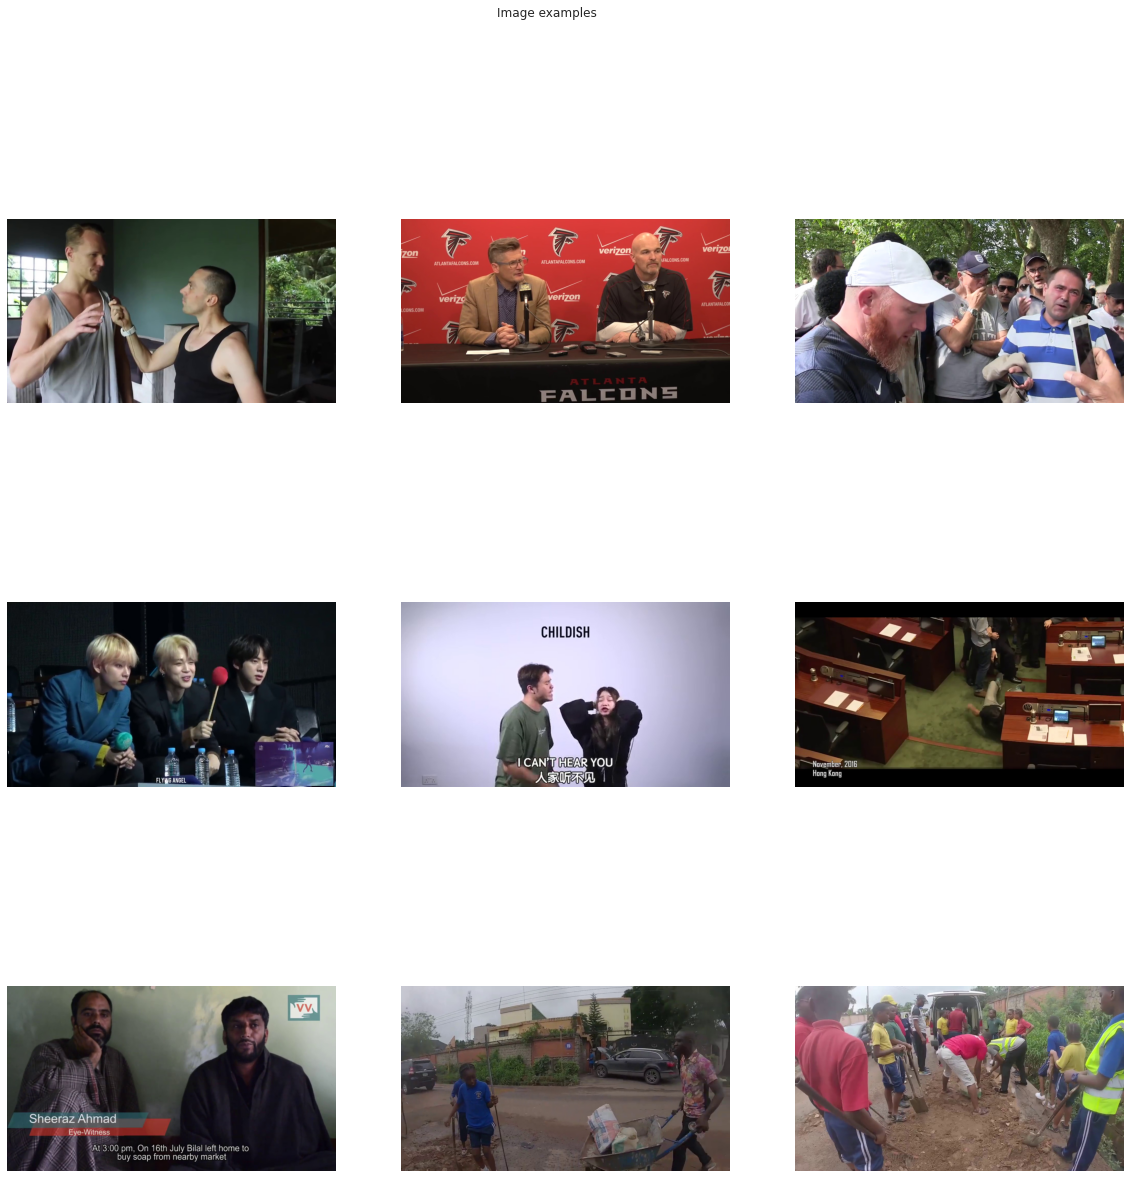

In [18]:
plot_image_examples(train_video_data)

# Audio

In [223]:
train_audio_data = "VGAF/Train_Audio/7_4.wav"

In [224]:
x , sr = librosa.load(train_audio_data)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [225]:
librosa.load(train_audio_data, sr=44100)

(array([-0.02548218, -0.02818298, -0.02345276, ...,  0.08581543,
         0.08595276,  0.087677  ], dtype=float32),
 44100)

In [226]:
import IPython.display as ipd
ipd.Audio(train_audio_data)

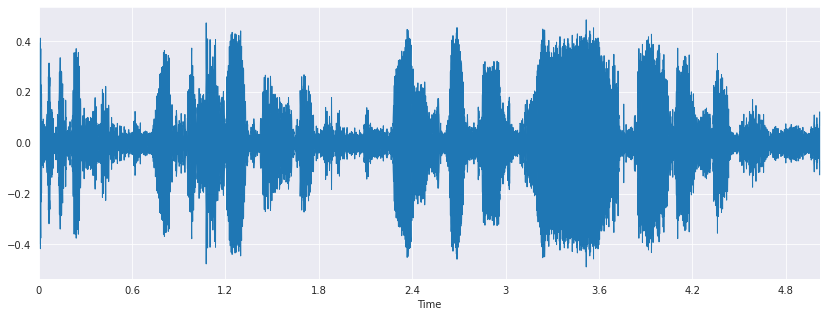

In [227]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr);

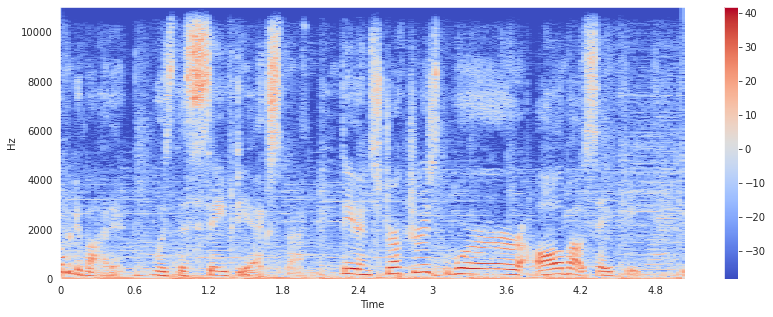

In [228]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

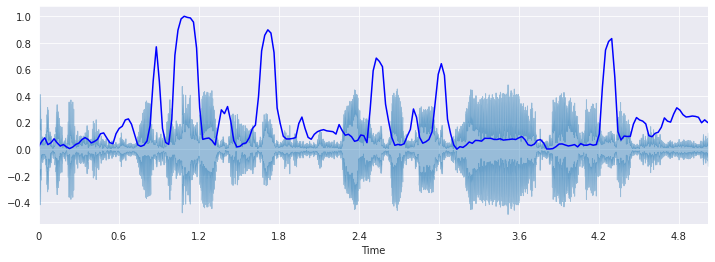

In [229]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b');


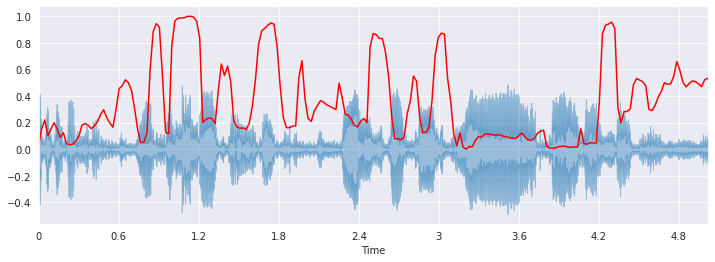

In [230]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r');

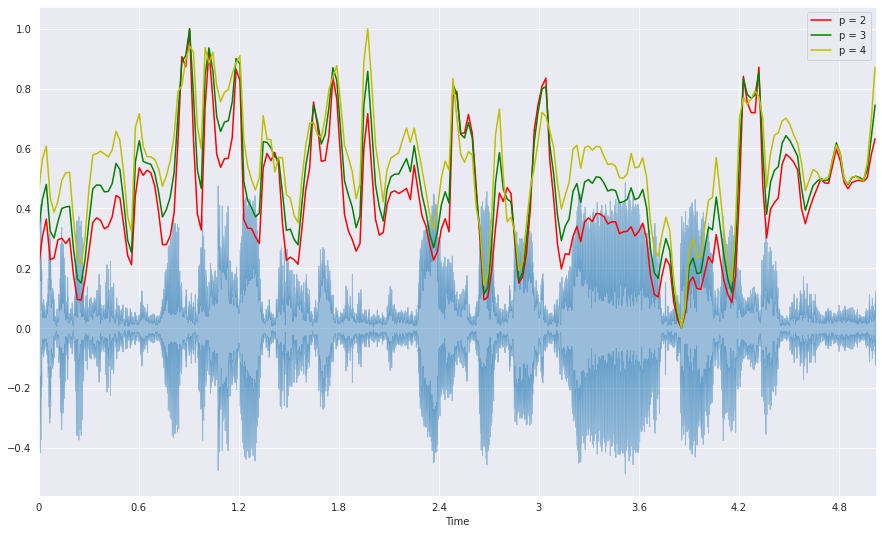

In [231]:
#  ?????????
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'));

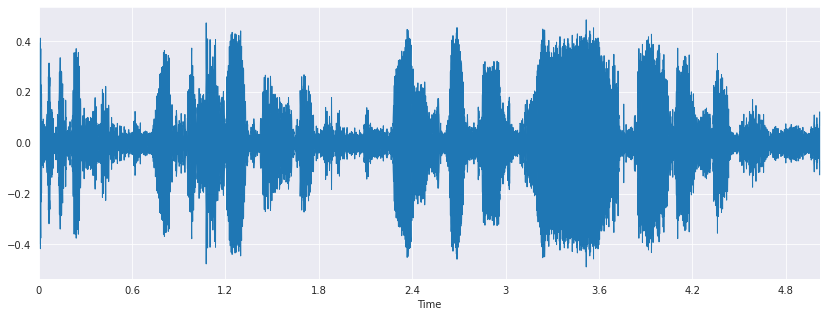

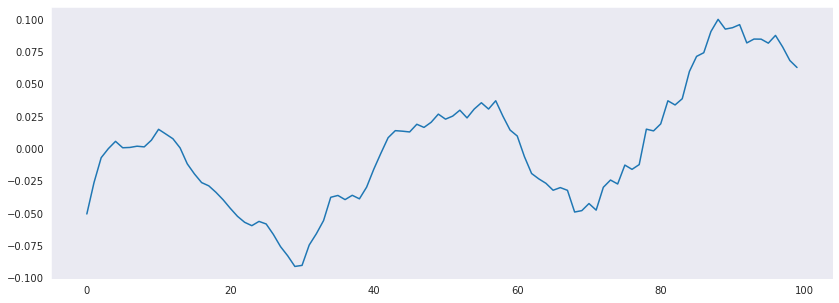

In [232]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [233]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

5


#### Maybe try to remove music somehow? 

(20, 217)


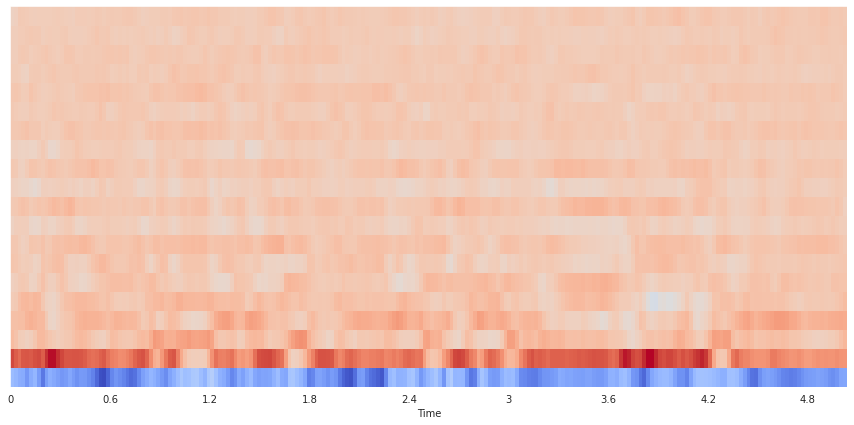

In [234]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

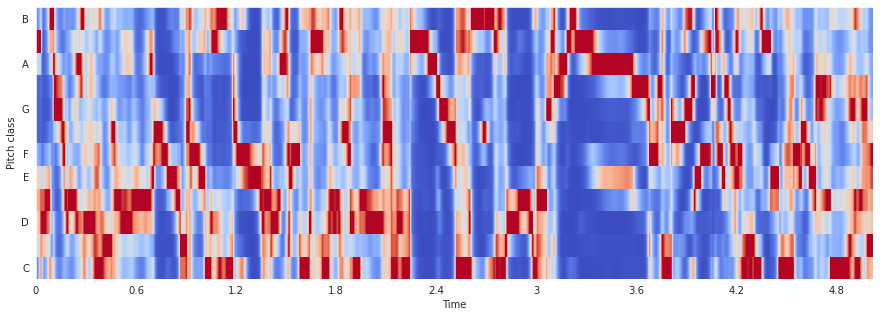

In [235]:
# it's useful for music
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=12)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=12, cmap='coolwarm');